In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Checkpoint 1

In [3]:
rounds = pd.read_csv('rounds2.csv', encoding='ISO 8859-1')
companies = pd.read_csv("companies.txt", sep="\t", encoding='ISO-8859-1')

In [4]:
companies.isna().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

## 1.1 How many unique companies are present in rounds?

In [5]:
rounds.company_permalink = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [6]:
rounds.company_permalink = rounds.company_permalink.str.lower()

In [7]:
len(rounds.company_permalink.unique())

66368

## 1.2 How many unique companies are present in the companies file?

In [8]:
companies.permalink = companies.permalink.str.lower()

In [9]:
len(companies.permalink.unique())

66368

## 1.3 In the companies data frame, which column can be used as the unique key for each company? Write the name of the column

permalink

## 1.4 Are there any companies in the rounds file which are not present in companies? Answer yes or no: Y/N

### method 1

In [10]:
diff = pd.concat([pd.Series(rounds.company_permalink), pd.Series(companies.permalink)])
diff.drop_duplicates(keep=False, inplace=True)
diff.shape

(0,)

### method 2

In [11]:
x = rounds.company_permalink.unique()
y = companies.permalink.unique()

if (x not in y):
    print('There are some companies in rounds file which are not present in companies file')
else:
    print('all the companies in rounds file are present in companies file')

all the companies in rounds file are present in companies file


### method 3

In [12]:
rounds.loc[~rounds.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


## 1.5 Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds data frame. Name the merged frame master_frame. How many observations are present in master_frame

In [13]:
master_frame = rounds.merge(companies, left_on='company_permalink', right_on='permalink')

In [14]:
rounds.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [15]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [16]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [17]:
master_frame.shape

(114949, 16)

In [57]:
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

# Checkpoint 2

In [18]:
rounds.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [19]:
rounds.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [20]:
rounds.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [21]:
types = ['venture', 'angel', 'seed', 'private_equity']
amt = []
for t in types:
    amt.append(master_frame.loc[master_frame.funding_round_type == t].raised_amount_usd.mean())
    print(f"{t}\t{amt[-1]}")

venture	11748949.129489528
angel	958694.4697530865
seed	719817.9969071728
private_equity	73308593.02944215


<BarContainer object of 4 artists>

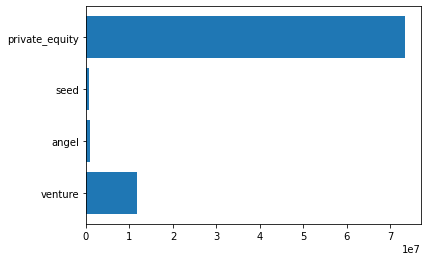

In [22]:
plt.barh(types, amt)

In [58]:
venture_df = master_frame.loc[master_frame.funding_round_type == 'venture']
venture_df.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         24509
funded_at                      0
raised_amount_usd           5266
permalink                      0
name                           0
homepage_url                2945
category_list               1132
status                         0
country_code                2875
state_code                  3796
region                      3554
city                        3554
founded_at                 11191
dtype: int64

# Checkpoint 3

In [24]:
# sort venture type investments in decreasing order of amount raised
top = venture_df.sort_values(by='raised_amount_usd', ascending=False)

In [84]:
top.iloc[-5266].raised_amount_usd

nan

In [25]:
top.country_code.unique()[:9]

array(['USA', 'CHN', 'IND', nan, 'GBR', 'NLD', 'SWE', 'FRA', 'SGP'],
      dtype=object)

In [26]:
top9 = venture_df.loc[venture_df.country_code.isin(['USA', 'IND', 'GBR'])]
top9.country_code.unique()

array(['IND', 'USA', 'GBR'], dtype=object)

we are not considering countries with raised amount NaN and countries with country code NaN

# Checkpoint 4

In [27]:
map = pd.read_csv('mapping.csv')
map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [28]:
sectors = map.columns
sectors

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [96]:
primary_sector = []
for i in companies_new.category_list:
    primary_sector.append(i.split('|')[0])
primary_sector = pd.Series(primary_sector)
primary_sector.shape

(63220,)

In [ ]:
a

In [79]:
import chardet

rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1254
